# BlackRock Algothon 2019
## Stock Directionality Prediction Model Using Social Media Data

In [1]:
# import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
start_date = '2016-07'
ric = 'AMZN'

## Social media features
### Facebook

In [3]:
# fbp_df = quandl.get_table('SMA/FBP', brand_ticker=ric, paginate=True)
fbp_df = pd.read_pickle('data/{}_fbp.pickle'.format(ric))

In [4]:
fbp_df.head()

,brand_ticker,page_id,post_id,sector,geography,type,created_time,total-reactions,reactions-like,reactions_love,...,reactions-wow,reactions-sad,reactions-angry,comments,shares,reach,impressions,engagement_score,sentiment,date
None,,,,,,,,,,,,,,,,,,,,,
0,AMZN,100281786832302,100281786832302_706279556232519,Retail Chains,India,VIDEO,2017-07-18 11:34:02 +0000,118,114,3,...,0,0,1,41,4,51510,85471,12,POSITIVE,2017-07-18
1,AMZN,100281786832302,100281786832302_705657566294718,Retail Chains,India,VIDEO,2017-07-17 05:31:47 +0000,218,208,5,...,0,0,5,57,8,82937,137617,20,POSITIVE,2017-07-17
2,AMZN,100281786832302,100281786832302_705123553014786,Retail Chains,India,PHOTO,2017-07-16 02:59:51 +0000,187,185,2,...,0,0,0,36,7,57879,96038,15,POSITIVE,2017-07-16
3,AMZN,100281786832302,100281786832302_704668073060334,Retail Chains,India,PHOTO,2017-07-15 02:30:00 +0000,153,150,3,...,0,0,0,30,7,54892,91081,13,POSITIVE,2017-07-15
4,AMZN,100281786832302,100281786832302_704323876428087,Retail Chains,India,VIDEO,2017-07-14 11:07:48 +0000,476,455,14,...,5,1,1,98,29,340281,564626,42,POSITIVE,2017-07-14


In [5]:
fbp_df.shape

(201656, 21)

In [6]:
fbp_df.tail()

,brand_ticker,page_id,post_id,sector,geography,type,created_time,total-reactions,reactions-like,reactions_love,...,reactions-wow,reactions-sad,reactions-angry,comments,shares,reach,impressions,engagement_score,sentiment,date
None,,,,,,,,,,,,,,,,,,,,,
201651,AMZN,15925638948,15925638948_10157989111928949,Media - Online,United States,VIDEO,2019-10-06 17:12:36 +0000,1892,1477,355,...,44,3,2,317,100,309972,514335,119,POSITIVE,2019-10-06
201652,AMZN,171220886240201,171220886240201_2942880685740860,Entertainment,United States,PHOTO,2019-10-06 17:41:10 +0000,25,22,2,...,1,0,0,1,3,4151,6888,53,POSITIVE,2019-10-06
201653,AMZN,272562266149741,272562266149741_3111238498948756,Retail Chains,Japan,VIDEO,2019-10-06 23:30:00 +0000,8,8,0,...,0,0,0,0,1,3756,6232,2,NEUTRAL,2019-10-06
201654,AMZN,272562266149741,272562266149741_3096859480386658,Retail Chains,Japan,VIDEO,2019-10-06 23:00:08 +0000,2,2,0,...,0,0,0,0,1,1773,2941,1,NEUTRAL,2019-10-06
201655,AMZN,272562266149741,272562266149741_3121005784638694,Retail Chains,Japan,VIDEO,2019-10-06 22:00:00 +0000,7,7,0,...,0,0,0,0,0,3277,5438,1,NEUTRAL,2019-10-06


In [7]:
fbp_df = fbp_df.set_index('post_id', drop=True)

fbp_df.head()

,brand_ticker,page_id,sector,geography,type,created_time,total-reactions,reactions-like,reactions_love,reactions-haha,reactions-wow,reactions-sad,reactions-angry,comments,shares,reach,impressions,engagement_score,sentiment,date
post_id,,,,,,,,,,,,,,,,,,,,
100281786832302_706279556232519,AMZN,100281786832302,Retail Chains,India,VIDEO,2017-07-18 11:34:02 +0000,118,114,3,0,0,0,1,41,4,51510,85471,12,POSITIVE,2017-07-18
100281786832302_705657566294718,AMZN,100281786832302,Retail Chains,India,VIDEO,2017-07-17 05:31:47 +0000,218,208,5,0,0,0,5,57,8,82937,137617,20,POSITIVE,2017-07-17
100281786832302_705123553014786,AMZN,100281786832302,Retail Chains,India,PHOTO,2017-07-16 02:59:51 +0000,187,185,2,0,0,0,0,36,7,57879,96038,15,POSITIVE,2017-07-16
100281786832302_704668073060334,AMZN,100281786832302,Retail Chains,India,PHOTO,2017-07-15 02:30:00 +0000,153,150,3,0,0,0,0,30,7,54892,91081,13,POSITIVE,2017-07-15
100281786832302_704323876428087,AMZN,100281786832302,Retail Chains,India,VIDEO,2017-07-14 11:07:48 +0000,476,455,14,0,5,1,1,98,29,340281,564626,42,POSITIVE,2017-07-14


In [12]:
count_data_cols = ['total-reactions', 'reactions-like', 'reactions_love', 'reactions-haha', 'reactions-wow',
                   'reactions-sad', 'reactions-angry', 'comments', 'shares', 'sentiment', 'date']

post_count_data = fbp_df.loc[:, count_data_cols]

post_count_data.head()

,total-reactions,reactions-like,reactions_love,reactions-haha,reactions-wow,reactions-sad,reactions-angry,comments,shares,sentiment,date
post_id,,,,,,,,,,,
100281786832302_706279556232519,118,114,3,0,0,0,1,41,4,POSITIVE,2017-07-18
100281786832302_705657566294718,218,208,5,0,0,0,5,57,8,POSITIVE,2017-07-17
100281786832302_705123553014786,187,185,2,0,0,0,0,36,7,POSITIVE,2017-07-16
100281786832302_704668073060334,153,150,3,0,0,0,0,30,7,POSITIVE,2017-07-15
100281786832302_704323876428087,476,455,14,0,5,1,1,98,29,POSITIVE,2017-07-14


One-hot encode the sentiment column:

In [14]:
from sklearn.preprocessing import OneHotEncoder

sentiment_oh_enc = OneHotEncoder()
sentiment = post_count_data['sentiment'].values.reshape(-1, 1)
sentiment_oh_enc.fit(sentiment)

sentiment_oh = sentiment_oh_enc.transform(sentiment).toarray()

sentiment_oh = pd.DataFrame(sentiment_oh, index=post_count_data.index, columns=['sent1', 'sent2', 'sent3', 'sent4'])

post_count_data = post_count_data.join(sentiment_oh)

In [15]:
post_count_data.drop('sentiment', axis=1, inplace=True)
post_count_data.head()

,total-reactions,reactions-like,reactions_love,reactions-haha,reactions-wow,reactions-sad,reactions-angry,comments,shares,date,sent1,sent2,sent3,sent4
post_id,,,,,,,,,,,,,,
100281786832302_706279556232519,118,114,3,0,0,0,1,41,4,2017-07-18,0.0,0.0,1.0,0.0
100281786832302_705657566294718,218,208,5,0,0,0,5,57,8,2017-07-17,0.0,0.0,1.0,0.0
100281786832302_705123553014786,187,185,2,0,0,0,0,36,7,2017-07-16,0.0,0.0,1.0,0.0
100281786832302_704668073060334,153,150,3,0,0,0,0,30,7,2017-07-15,0.0,0.0,1.0,0.0
100281786832302_704323876428087,476,455,14,0,5,1,1,98,29,2017-07-14,0.0,0.0,1.0,0.0


In [19]:
post_count_daysum = post_count_data.groupby('date').sum()

post_count_daysum.head()

,total-reactions,reactions-like,reactions_love,reactions-haha,reactions-wow,reactions-sad,reactions-angry,comments,shares,sent1,sent2,sent3,sent4
date,,,,,,,,,,,,,
2014-01-01,89786,89786,0,0,0,0,0,6604,25192,2.0,12.0,45.0,11.0
2014-01-02,75440,75440,0,0,0,0,0,2164,6541,3.0,8.0,59.0,22.0
2014-01-03,152561,152561,0,0,0,0,0,4344,5064,1.0,12.0,60.0,29.0
2014-01-04,34469,34469,0,0,0,0,0,1018,1734,7.0,6.0,25.0,9.0
2014-01-05,55124,55124,0,0,0,0,0,5039,4936,1.0,7.0,33.0,13.0


Aggregating data - weighted sum:

In [20]:
def weights_n_days(n, alpha=3):
    return 1 - np.exp(-alpha * np.linspace(0, 1, n))

def weighted_sum(s, n):
    return np.sum(s * weights_n_days(n))

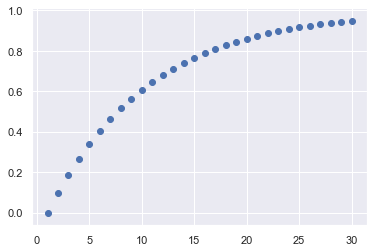

In [21]:
plt.scatter(range(1, 31), weights_n_days(30))

In [22]:
reactions = ['reactions-like', 'reactions_love', 'reactions-haha', 'reactions-wow', 'reactions-sad', 'reactions-angry']

rolling_sum_30d = post_count_daysum.rolling(window=30).apply(lambda s: weighted_sum(s, 30))
rolling_sum_10d = post_count_daysum.rolling(window=10).apply(lambda s: weighted_sum(s, 10))

# fraction of each reaction
rolling_sum_30d.loc[:, reactions] = rolling_sum_30d.loc[:, reactions].div(rolling_sum_30d.loc[:, 'total-reactions'], axis=0)
rolling_sum_10d.loc[:, reactions] = rolling_sum_10d.loc[:, reactions].div(rolling_sum_10d.loc[:, 'total-reactions'], axis=0)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


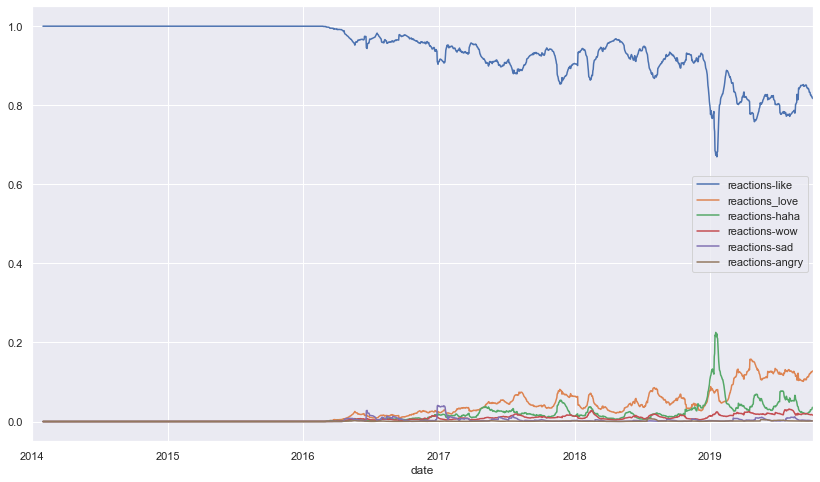

In [23]:
rolling_sum_30d.loc[:, reactions].plot(figsize=(14, 8))

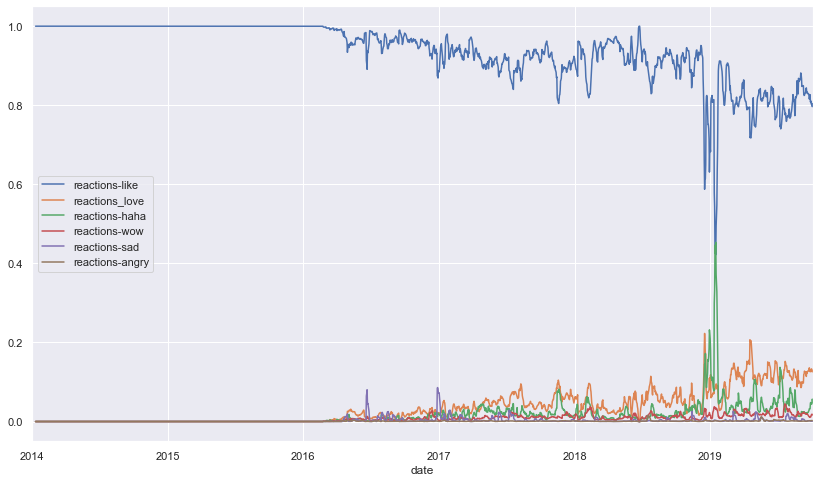

In [24]:
rolling_sum_10d.loc[:, reactions].plot(figsize=(14, 8))

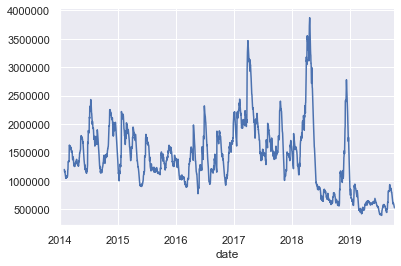

In [25]:
rolling_sum_30d['total-reactions'].plot()

In [26]:
def min_max_standardise(s):
    return (s - s.min()) / (s.max() - s.min())

In [27]:
to_normalise_names = ['total-reactions', 'comments', 'shares']

to_normalise_30d = rolling_sum_30d.loc[:, to_normalise_names]
to_normalise_30d = ( to_normalise_30d / to_normalise_30d.rolling(window=200).std() ).loc[start_date:]
to_normalise_30d = min_max_standardise(to_normalise_30d)
rolling_sum_30d.loc[:, to_normalise_names] = to_normalise_30d

to_normalise_10d = rolling_sum_10d.loc[:, to_normalise_names]
to_normalise_10d = ( to_normalise_10d / to_normalise_10d.rolling(window=200).std() ).loc[start_date:]
to_normalise_10d = min_max_standardise(to_normalise_10d)
rolling_sum_10d.loc[:, to_normalise_names] = to_normalise_10d

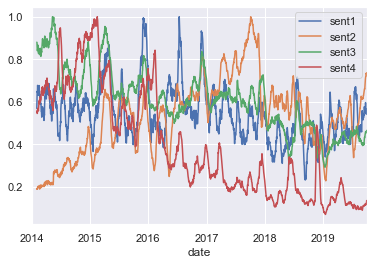

In [29]:
sentiment_col_names = ['sent' + str(i) for i in range(1, 5)]

sentiment_cols_30d = rolling_sum_30d.loc[:, sentiment_col_names]
sentiment_cols_30d = sentiment_cols_30d / sentiment_cols_30d.max()

sentiment_cols_10d = rolling_sum_10d.loc[:, sentiment_col_names]
sentiment_cols_10d = sentiment_cols_10d / sentiment_cols_10d.max()

sentiment_cols_30d.plot()

Combine facebook features:

In [30]:
fb_features = pd.concat([
    rolling_sum_30d.drop(sentiment_col_names, axis=1),
    rolling_sum_10d.drop(sentiment_col_names, axis=1),
    sentiment_cols_30d,
    sentiment_cols_10d
], axis=1).loc[start_date:]

fb_features.head()

,total-reactions,reactions-like,reactions_love,reactions-haha,reactions-wow,reactions-sad,reactions-angry,comments,shares,total-reactions,...,comments,shares,sent1,sent2,sent3,sent4,sent1,sent2,sent3,sent4
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,0.756438,0.967189,0.010348,0.002209,0.004483,0.015442,0.000329,0.393040,0.213366,0.471321,...,0.323353,0.069788,0.688350,0.684144,0.550785,0.386687,0.535752,0.656744,0.509833,0.362948
2016-07-02,0.733527,0.967665,0.010266,0.002179,0.004433,0.015153,0.000304,0.397276,0.206210,0.439415,...,0.325739,0.056601,0.689755,0.682625,0.546510,0.378949,0.555592,0.635441,0.491139,0.323604
2016-07-03,0.698331,0.967801,0.010168,0.002181,0.004426,0.015130,0.000294,0.396493,0.200732,0.380963,...,0.323617,0.058552,0.692222,0.673234,0.531959,0.374203,0.576268,0.595549,0.449986,0.299921
2016-07-04,0.688399,0.969095,0.009713,0.002086,0.004259,0.014576,0.000271,0.387408,0.191625,0.355958,...,0.302918,0.052509,0.701961,0.657775,0.526195,0.370497,0.607942,0.544148,0.437885,0.281112
2016-07-05,0.658213,0.969099,0.009543,0.002068,0.004320,0.014711,0.000259,0.388048,0.185953,0.283145,...,0.302834,0.051182,0.732866,0.655743,0.522483,0.367071,0.681642,0.540739,0.432702,0.260890


### Instagram

In [31]:
# insp_df = quandl.get_table('SMA/INSP', brand_ticker=ric, paginate=True)
insp_df = pd.read_pickle('data/{}_insp.pickle'.format(ric))

insp_df.head()

,brand_ticker,ins_account_name,brand_name,post_id,sector,geography,post_created_at,type,likes_count,comments_count,engagement_score,date
None,,,,,,,,,,,,
0,AMZN,amazondotin,Amazon India,pJTsRbwRAT,Retail Chains,India,2014-06-12 09:19:25 +0000,image,4,0,0,2014-06-12
1,AMZN,amazondotin,Amazon India,pLhz_GQRMc,Retail Chains,India,2014-06-13 06:01:17 +0000,image,1,0,0,2014-06-13
2,AMZN,amazondotin,Amazon India,pLiiFRwRNE,Retail Chains,India,2014-06-13 06:07:35 +0000,image,2,0,0,2014-06-13
3,AMZN,amazondotin,Amazon India,pL6cYfQRIa,Retail Chains,India,2014-06-13 09:36:31 +0000,image,3,0,0,2014-06-13
4,AMZN,amazondotin,Amazon India,pQY6fjwRNo,Retail Chains,India,2014-06-15 03:19:44 +0000,image,5,0,0,2014-06-15


In [32]:
insp_df.shape

(32210, 12)

In [33]:
insp_df.set_index('post_id', inplace=True)

Weighted sum:

In [34]:
insp_count_data = insp_df.loc[:, ['likes_count', 'comments_count', 'date']]
insp_count_daysum = insp_count_data.groupby('date').sum()
insp_count_30d = insp_count_daysum.rolling(30).apply(lambda s: weighted_sum(s, 30))
insp_count_10d = insp_count_daysum.rolling(10).apply(lambda s: weighted_sum(s, 10))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


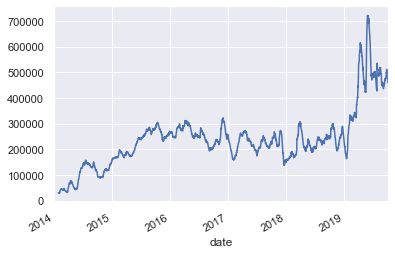

In [35]:
insp_count_30d['likes_count'].plot()

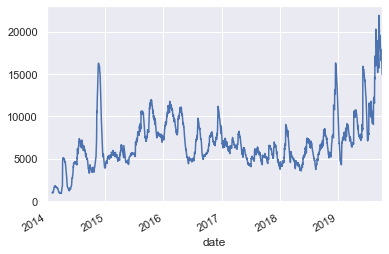

In [36]:
insp_count_30d['comments_count'].plot()

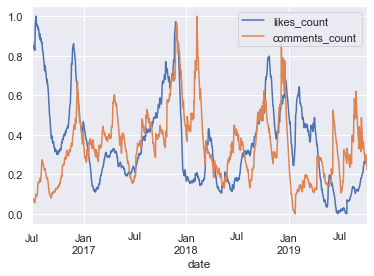

In [37]:
insp_count_30d = (insp_count_30d / insp_count_30d.rolling(window=200).std()).loc[start_date:]
insp_count_10d = (insp_count_10d / insp_count_10d.rolling(window=200).std()).loc[start_date:]

insp_count_30d = min_max_standardise(insp_count_30d)
insp_count_10d = min_max_standardise(insp_count_10d)

insp_count_30d.plot()

In [38]:
insta_features = pd.concat([
    insp_count_30d,
    insp_count_10d
], axis=1)

insta_features.head()

,likes_count,comments_count,likes_count,comments_count
date,,,,
2016-07-01,0.872538,0.079457,0.712627,0.138872
2016-07-02,0.871604,0.077247,0.727294,0.142069
2016-07-03,0.853711,0.072941,0.691034,0.139708
2016-07-04,0.843712,0.063876,0.694367,0.127490
2016-07-05,0.844167,0.071124,0.712742,0.159333


## Targets to predict
Direction of the stock price:

In [39]:
# prices = quandl.get('EOD/{}'.format(ric), paginate=True)
prices = pd.read_pickle('data/{}_prices.pickle'.format(ric))

prices.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1997-05-16,22.38,23.75,20.50,20.75,1225000.0,0.0,1.0,1.865000,1.979167,1.708333,1.729167,14700000.0
1997-05-19,20.50,21.25,19.50,20.50,508900.0,0.0,1.0,1.708333,1.770833,1.625000,1.708333,6106800.0
1997-05-20,20.75,21.00,19.63,19.63,455600.0,0.0,1.0,1.729167,1.750000,1.635833,1.635833,5467200.0
1997-05-21,19.25,19.75,16.50,17.13,1571100.0,0.0,1.0,1.604167,1.645833,1.375000,1.427500,18853200.0
1997-05-22,17.25,17.38,15.75,16.75,981400.0,0.0,1.0,1.437500,1.448333,1.312500,1.395833,11776800.0


In [40]:
prices = prices.loc['2012':fb_features.index[-1], 'Adj_Close']

In [41]:
prices = prices.resample('B').interpolate(method='cubic')

In [42]:
def get_direction(s, n):
    direction = s.shift(-n) - s
    direction[direction >= 0] = 1
    direction[direction < 0] = 0
    return direction

In [43]:
direction_4w = get_direction(prices, 20)
direction_8w = get_direction(prices, 40)

direction_4w.head()

Date
2012-01-03    1.0
2012-01-04    1.0
2012-01-05    1.0
2012-01-06    1.0
2012-01-09    1.0
Freq: B, Name: Adj_Close, dtype: float64

In [44]:
def process_targets(y, start_date=start_date):
    return y[start_date:].dropna()

direction_4w = process_targets(direction_4w)
direction_8w = process_targets(direction_8w)

direction_4w.index

DatetimeIndex(['2016-07-01', '2016-07-04', '2016-07-05', '2016-07-06',
               '2016-07-07', '2016-07-08', '2016-07-11', '2016-07-12',
               '2016-07-13', '2016-07-14',
               ...
               '2019-08-26', '2019-08-27', '2019-08-28', '2019-08-29',
               '2019-08-30', '2019-09-02', '2019-09-03', '2019-09-04',
               '2019-09-05', '2019-09-06'],
              dtype='datetime64[ns]', name='Date', length=831, freq='B')

Combine all features:

In [45]:
features = pd.concat([
    fb_features,
    insta_features
], axis=1).loc[direction_8w.index]

Filter out nan rows:

In [46]:
keep_index = features.loc[features.isna().sum(axis=1) == 0].index
X = features.loc[keep_index]
y = direction_8w[keep_index]

## Training

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.arange(50, 1500, 50)]
max_features = ['sqrt']
max_depth = [int(x) for x in range(10, 110, 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_clf = RandomForestClassifier()

rf_cv_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

In [54]:
rf_cv_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   57.0s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [55]:
rf_cv_search.best_params_

{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = rf_cv_search.best_estimator_.predict(X_test)
accuracy_score(y_pred, y_test)

0.9263803680981595

In [57]:
confusion_matrix(y_test, y_pred)

array([[ 47,   6],
       [  6, 104]])